 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns = pd.read_csv("Resources/whale_returns.csv")
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [30]:
# Change index to date and reformat Paulson & Co.Inc. header
whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True), inplace=True)
whale_returns.drop(columns=["Date"], inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns = pd.read_csv("Resources/algo_returns.csv")


In [7]:
# Count nulls
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns.dropna(inplace= True)
algo_returns.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


In [29]:
# Change index to date
algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format=True), inplace=True)
algo_returns.drop(columns=["Date"], inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [32]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv("Resources/sp500_history.csv")

In [33]:
sp500_history.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [34]:
# Check Data Types
sp500_history.dtypes

Date     object
Close    object
dtype: object

In [35]:
# Fix Data Types
# sp500_history['Date'] = pd.to_datetime(sp500_history['Date'])
sp500_history["Close"] = sp500_history["Close"].str.replace('$', '')
sp500_history["Close"] = sp500_history["Close"].astype('float')
sp500_history.dtypes

C:\Users\prade\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Date      object
Close    float64
dtype: object

In [13]:
sp500_history.dtypes

Date     datetime64[ns]
Close            object
dtype: object

In [37]:
#Change index to date
sp500_history.set_index(pd.to_datetime(sp500_history['Date'], infer_datetime_format=True), inplace=True)
sp500_history.drop(columns=["Date"], inplace=True)

In [38]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [40]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [41]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ["S&P 500 Daily Returns"]
sp500_daily_returns.head()

,S&P 500 Daily Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [45]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

portfolio_comparison = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis="columns", join="inner")
portfolio_comparison

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

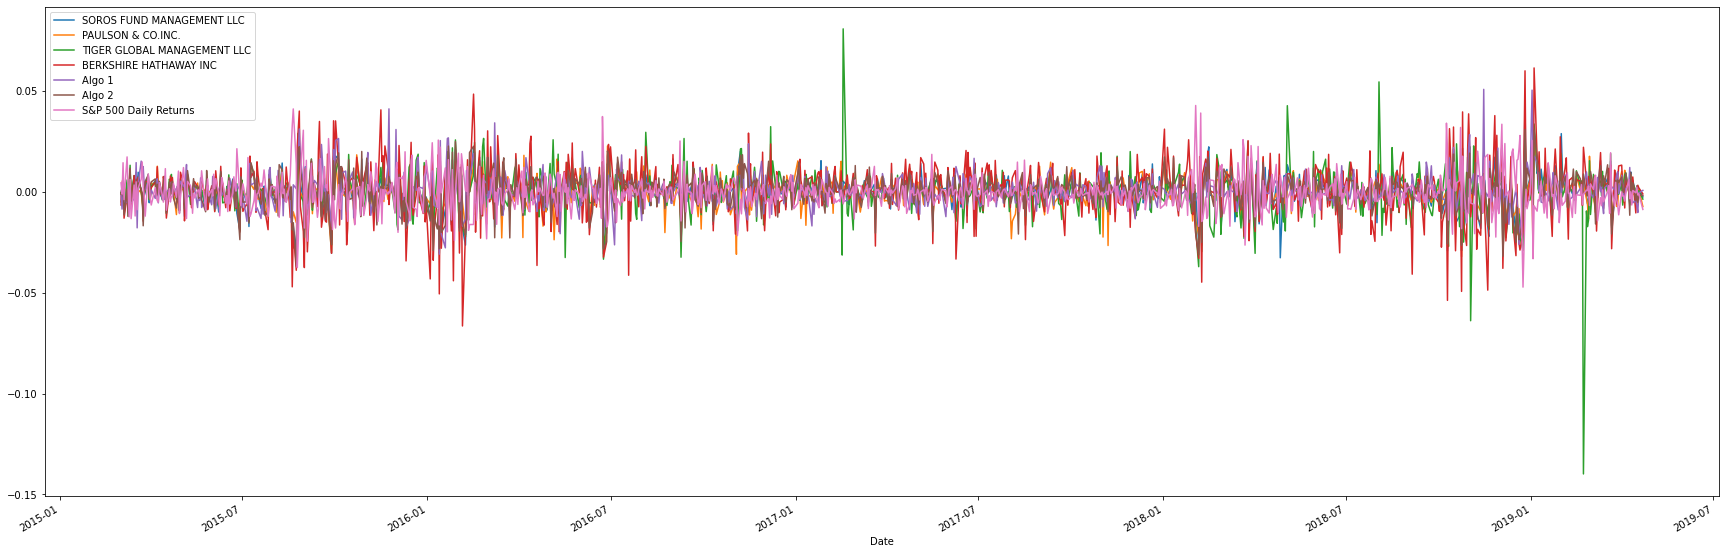

In [46]:
# Plot daily returns of all portfolios
portfolio_comparison .plot(figsize = (30,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

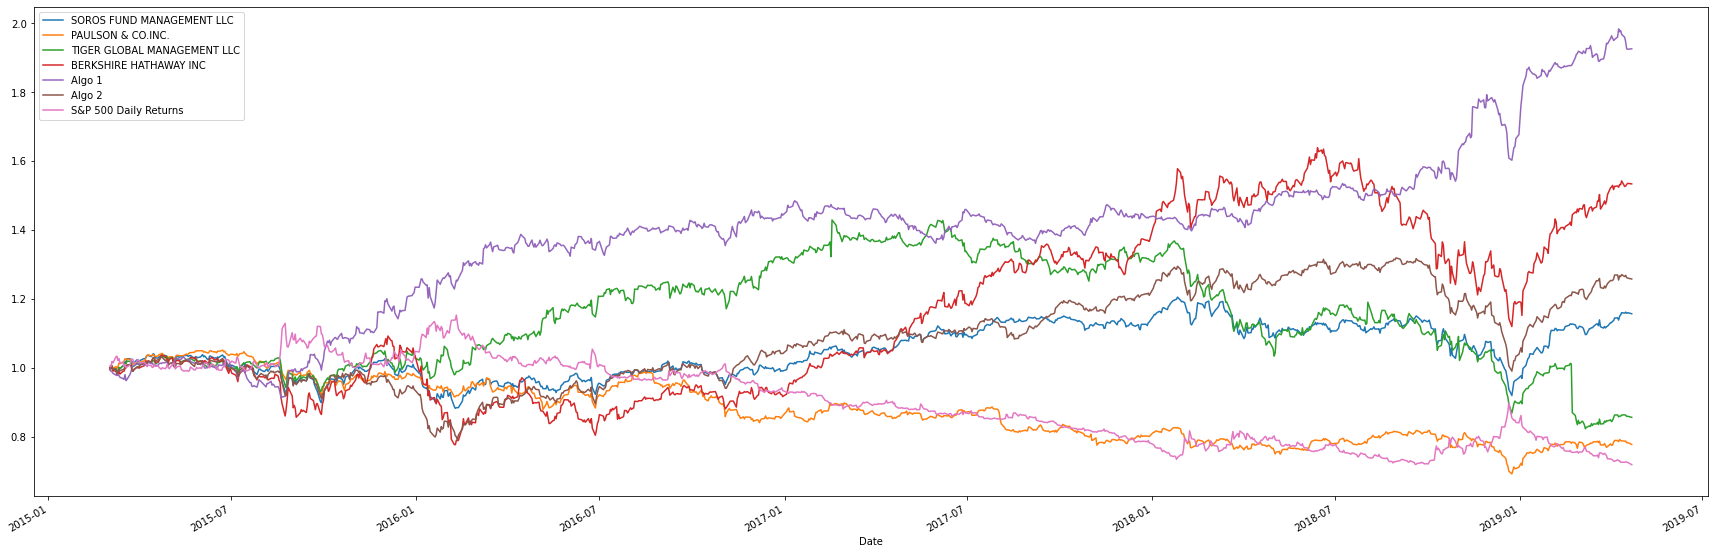

In [47]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_comparison).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize = (30,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

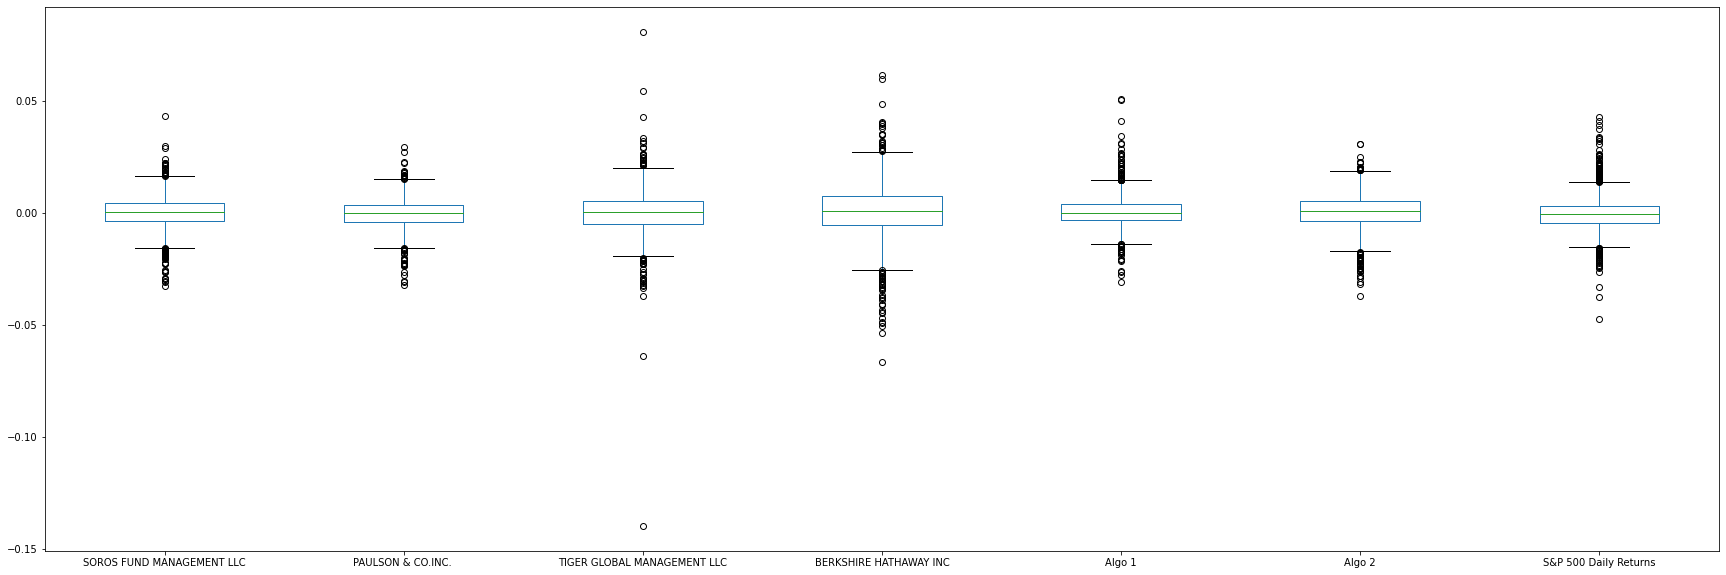

In [48]:
# Box plot to visually show risk
portfolio_comparison.plot(kind='box', figsize = (30,10))

### Calculate Standard Deviations

In [115]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = combined_df.std()
combined_df_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007733
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [49]:
# Calculate  the daily standard deviation of S&P 500
portfolio_comparison_std = portfolio_comparison.std()
portfolio_comparison_std


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500 Daily Returns          0.008587
dtype: float64

Berkshire Hathaway and Tiger Global are risker than the S&P 500

### Calculate the Annualized Standard Deviation

In [31]:
# Calculate the annualized standard deviation (252 trading days)
portfolio_comparison_std_annual = portfolio_comparison_std * np.sqrt(252)
portfolio_comparison_std_annual

,std
SOROS FUND MANAGEMENT LLC,0.124700
PAULSON & CO.INC.,0.110926
TIGER GLOBAL MANAGEMENT LLC,0.172156
BERKSHIRE HATHAWAY INC,0.203994
Algo 1,0.122946
Algo 2,0.131206
sp500,4821.224364


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

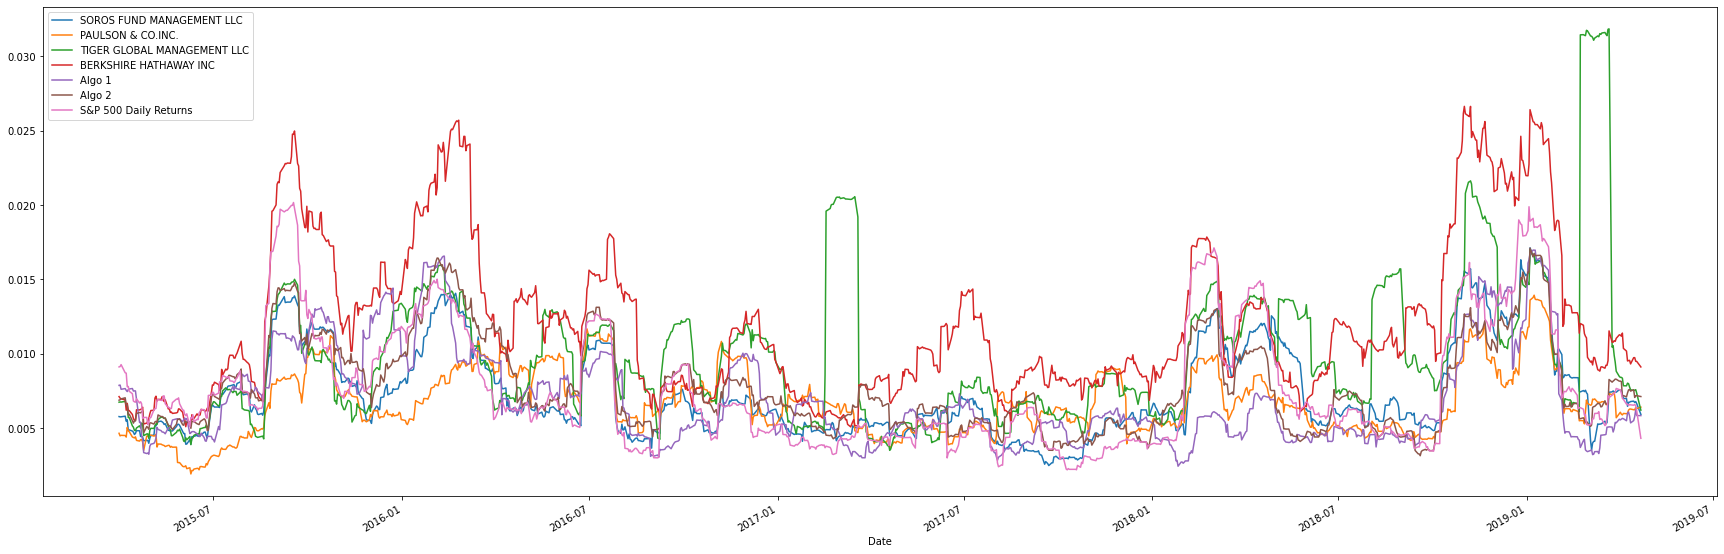

In [50]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_comparison_std_roll = portfolio_comparison.rolling(window=21).std()

# Plot the rolling standard deviation
portfolio_comparison_std_roll.plot(figsize=(30,10))

### Calculate and plot the correlation

In [52]:
# Calculate the correlation
portfolio_comparison_corr = portfolio_comparison.corr()

# Display de correlation matrix
portfolio_comparison_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500 Daily Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [58]:
# Remove symbols and punctuation from column names
col_names = ['SOROS', 'PAULSON', 'TIGER', 'BERKSHIRE', 'Algo1', 'Algo2', 'S&P 500']
portfolio_comparison.columns = col_names
portfolio_comparison.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo1,Algo2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [59]:
# Calculate covariance of a single portfolio
soros = portfolio_comparison['SOROS'].cov(portfolio_comparison['S&P 500'])
paulson = portfolio_comparison["PAULSON"].cov(portfolio_comparison['S&P 500'])
tiger = portfolio_comparison['TIGER'].cov(portfolio_comparison['S&P 500'])
berkshire = portfolio_comparison['BERKSHIRE'].cov(portfolio_comparison['S&P 500'])
algo1 = portfolio_comparison['Algo1'].cov(portfolio_comparison['S&P 500'])
algo2 = portfolio_comparison['Algo2'].cov(portfolio_comparison['S&P 500'])
algo1

-2.2230425517155125e-06

In [60]:
# Calculate variance of S&P 500
sp500_var = portfolio_comparison['S&P 500'].var()

In [61]:
# Computing beta
soros_beta = soros / sp500_var
paulson_beta = paulson / sp500_var
tiger_beta = tiger / sp500_var
berkshire_beta = berkshire / sp500_var
algo1_beta = algo1 / sp500_var
algo2_beta = algo2 / sp500_var

      SOROS   PAULSON    TIGER  BERKSHIRE     Algo1     Algo2
0  0.000528  0.011085 -0.00191  -0.020846 -0.030149 -0.002129


<AxesSubplot:>

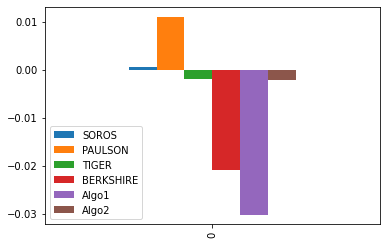

In [62]:
# Plot beta trend
betas = [soros_beta, paulson_beta, tiger_beta, berkshire_beta, algo1_beta, algo2_beta]
betas_dict = dict(zip(col_names, betas))
betas_df = pd.DataFrame(betas_dict, index =[0])
print(betas_df)
betas_df.plot(kind='bar')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

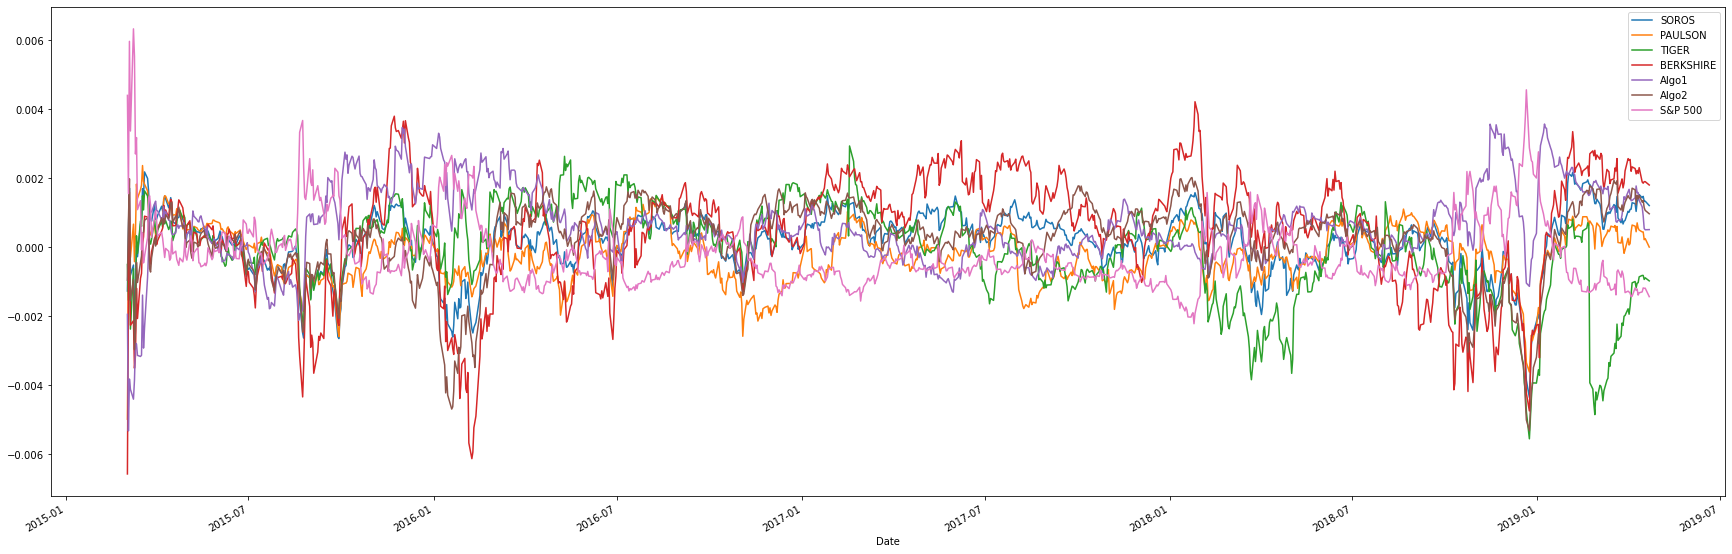

In [63]:
# Use `ewm` to calculate the rolling window
portfolio_comparison_ewm = portfolio_comparison.ewm(halflife=21).mean()
portfolio_comparison_ewm.plot(figsize = (30,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [34]:
# Annualized Sharpe Ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC        0.367157
PAULSON & CO.INC.               -0.470044
TIGER GLOBAL MANAGEMENT LLC     -0.113992
BERKSHIRE HATHAWAY INC           0.633782
Algo 1                           1.070733
Algo 2                           0.804573
sp500                          123.947777
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

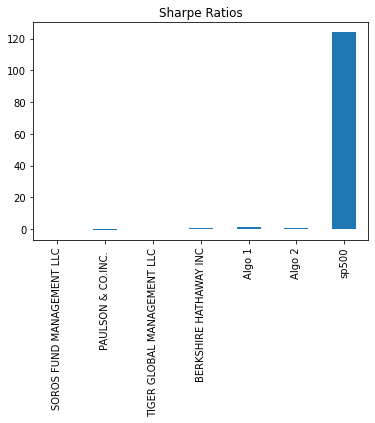

In [35]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

# Algo 1 has the highest cumulative return (profit), lowest beta (risk). So, it  outperforms the S&P 500 as well as all of the Whale portfolios. It 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [80]:
# Reading data from 1st stock
aapl_history = pd.read_csv(Path("Resources/aapl_historical.csv"), index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_history.sort_index(inplace=True)
aapl_history.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [81]:
# Reading data from 2nd stock
cost_history = pd.read_csv(Path("Resources/cost_historical.csv"),index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_history.sort_index(inplace=True)
cost_history.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [84]:
# Reading data from 3rd stock
goog_history = pd.read_csv(Path("Resources/goog_historical.csv"), index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_history.sort_index(inplace=True)
goog_history.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [85]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat([goog_history,aapl_history, cost_history], axis="columns", join="inner")
my_stocks

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18


In [86]:
# Reset Date index
my_stocks.reset_index
my_stocks.columns

Index(['Symbol', 'NOCP', 'Symbol', 'NOCP', 'Symbol', 'NOCP'], dtype='object')

In [90]:
# Reorganize portfolio data by having a column per symbol
my_stocks= my_stocks.drop('Symbol', axis=1)
my_stocks.columns = ['GOOG', 'AAPL', 'COST']
# combined_df
my_stocks

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [92]:
# Calculate daily returns
my_portfolio_daily_returns = my_stocks.pct_change()

# Drop NAs
my_portfolio_daily_returns.dropna(inplace=True)

# Display sample data
my_portfolio_daily_returns.head(10)

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206
2018-05-21,0.012397,0.007085,0.003317
2018-05-22,-0.009124,-0.002505,-0.003256
2018-05-23,0.009311,0.006412,-0.004171
2018-05-24,-0.000417,-0.001115,0.003785


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [93]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_weighted_returns = my_portfolio_daily_returns.dot(weights)

# Display sample data
portfolio_weighted_returns.dropna(inplace=True)
portfolio_weighted_returns.head(10)

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
2018-05-21    0.007600
2018-05-22   -0.004962
2018-05-23    0.003850
2018-05-24    0.000751
2018-05-25   -0.001232
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [95]:
# Join your returns DataFrame to the original returns DataFrame
final_combined_df = pd.concat([portfolio_comparison , portfolio_weighted_returns], axis='columns', join='inner')
final_combined_df.rename(columns = {0:"My Portfolio"}, inplace = True)
final_combined_df.head(10)

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo1,Algo2,S&P 500,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.003146,0.007600
2018-05-22,-0.002345,0.001168,-0.000240,-0.002455,0.011234,-0.005628,-0.003238,-0.004962
2018-05-23,-0.000899,-0.000659,0.005062,0.011108,-0.002093,0.001962,0.002027,0.003850
2018-05-24,-0.002160,-0.002229,0.000880,0.002245,0.001075,-0.001121,0.002363,0.000751
2018-05-25,0.002146,0.002160,0.008299,-0.000916,-0.001142,-0.001605,0.011699,-0.001232


In [96]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_combined_df.dropna(inplace=True)
final_combined_df.head(10)

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo1,Algo2,S&P 500,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.003146,0.007600
2018-05-22,-0.002345,0.001168,-0.000240,-0.002455,0.011234,-0.005628,-0.003238,-0.004962
2018-05-23,-0.000899,-0.000659,0.005062,0.011108,-0.002093,0.001962,0.002027,0.003850
2018-05-24,-0.002160,-0.002229,0.000880,0.002245,0.001075,-0.001121,0.002363,0.000751
2018-05-25,0.002146,0.002160,0.008299,-0.000916,-0.001142,-0.001605,0.011699,-0.001232


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [97]:
# Calculate std
combined_std = final_combined_df.std()
combined_std = combined_std.sort_values(ascending=False)

# # Calculate the annualized standard deviation (252 trading days)
combined_annualized_std_df = combined_std * np.sqrt(252)

# # Sort by descending Annualized Standard Deviation 
combined_annualized_std_df_sorted = combined_annualized_std_df.sort_values(ascending=False)
combined_annualized_std_df_sorted

BERKSHIRE       0.247305
TIGER           0.232898
My Portfolio    0.211627
S&P 500         0.152469
SOROS           0.146812
Algo2           0.139499
Algo1           0.133927
PAULSON         0.116928
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-day Standard Deviation of Daily Price Change for all Portfolios'}>

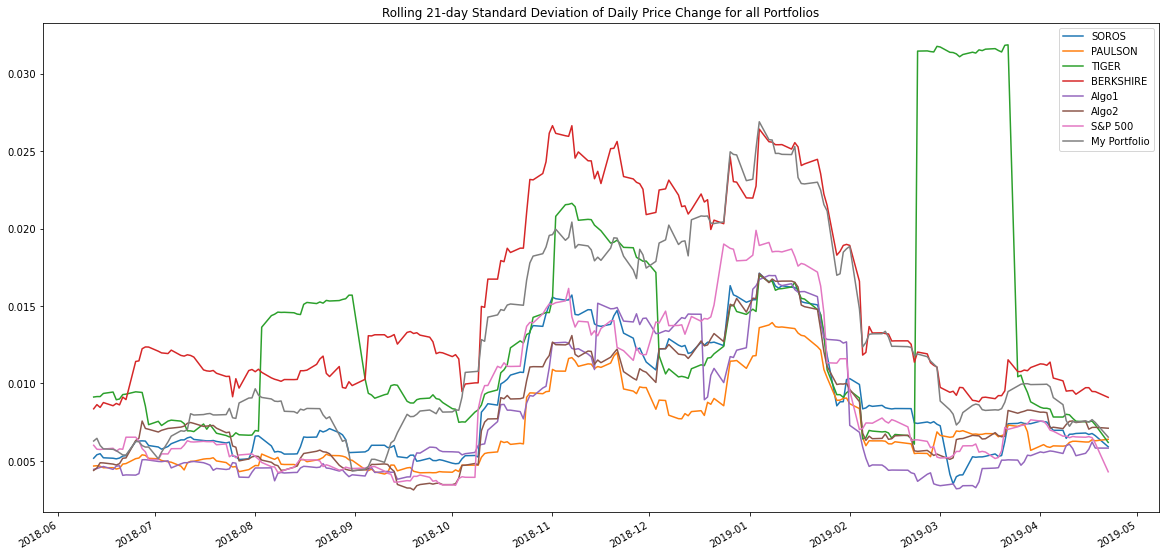

In [98]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_std_rolling_21_day_df = final_combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_std_rolling_21_day_df.plot(figsize=(20,10), title = 'Rolling 21-day Standard Deviation of Daily Price Change for all Portfolios')


### Calculate and plot the correlation

In [99]:
# Calculate the correlation
correlation_matrix = final_combined_df.corr()

# Display de correlation matrix
correlation_matrix


,SOROS,PAULSON,TIGER,BERKSHIRE,Algo1,Algo2,S&P 500,My Portfolio
SOROS,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.732548
PAULSON,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643828
TIGER,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390961
BERKSHIRE,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.800558
Algo1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260331
Algo2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739020
S&P 500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005603
My Portfolio,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My portfolio vs. S&P 500'}, ylabel='BETA'>

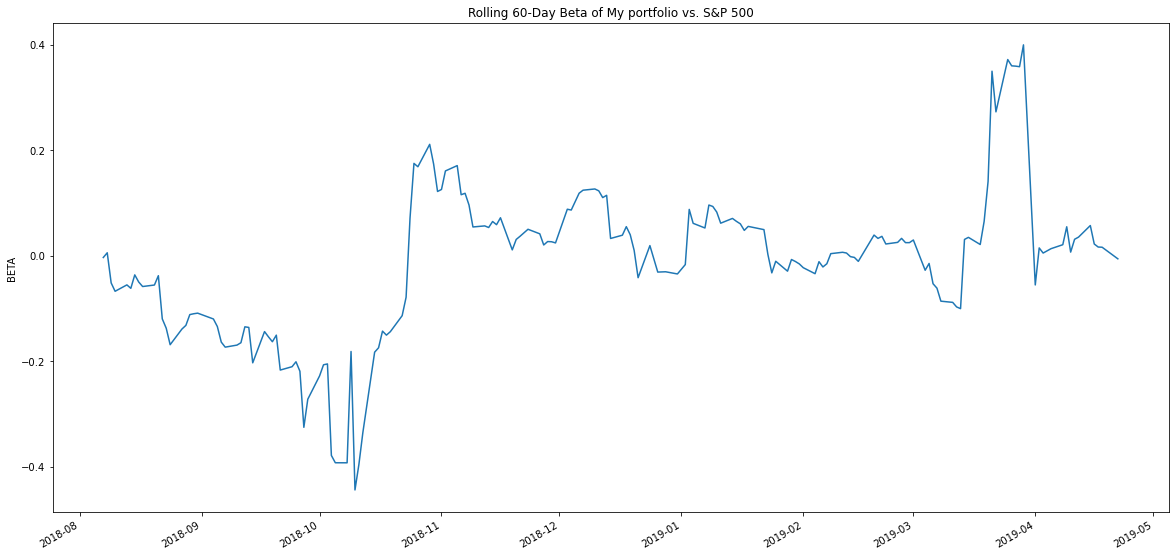

In [106]:
# calculate rolling covariance my portfolio vs. S&P 500

my_rolling_covariance = final_combined_df['My Portfolio'].rolling(window=60).cov(final_combined_df['S&P 500'])

# calculate rolling variance of S&P 500 daily returns
rolling_variance_SP500 = final_combined_df['S&P 500'].rolling(window=60).var()

# calculate Rolling Beta and plot
rolling_beta = my_rolling_covariance  / rolling_variance_SP500
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My portfolio vs. S&P 500', ylabel='BETA')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [102]:

# Calculate Annualzied Sharpe Ratios
annualized_sharpe_ratios = final_combined_df.mean() * 252 / (final_combined_df.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Annualized Sharpe ratios for all portfolios'}>

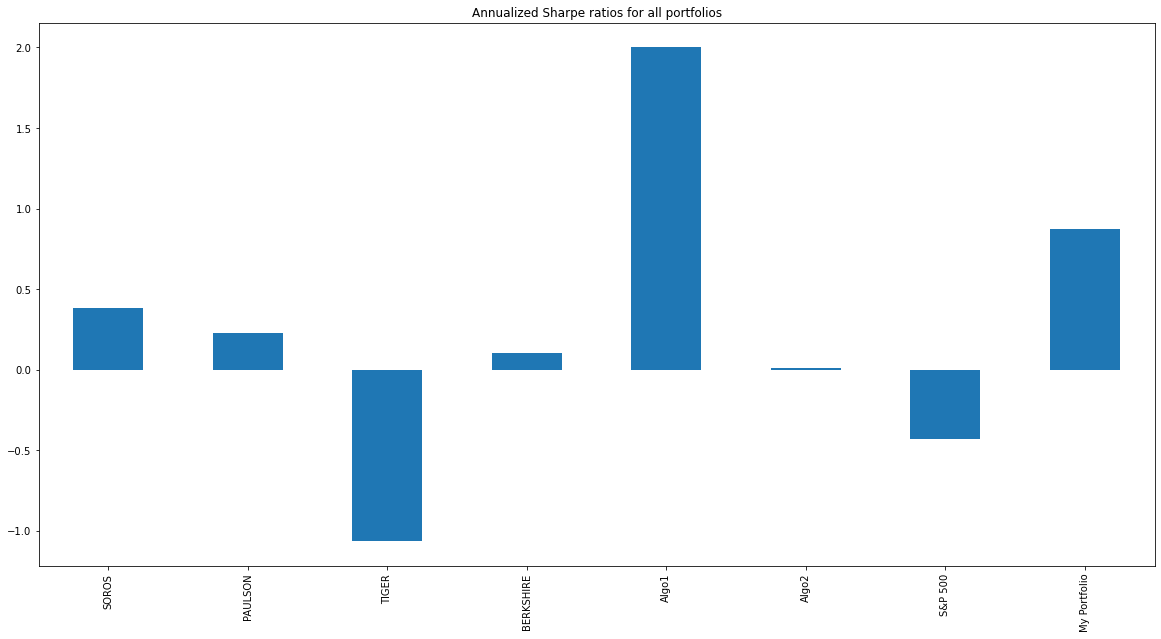

In [105]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(figsize = (20,10), kind = "bar", title = "Annualized Sharpe ratios for all portfolios")

### How does your portfolio do?

Write your answer here!

In [ ]:
Portfolio did decently. It was in second place behind Algo 1 and in front of the S&P 500.